## Embedding in $d=1$ (one pattern, $p=1$)

~~Start the neurons close to the known fixed point $\xi^1_i$~~

Actually it looks like if there are enough neurons, we can just start them from zero

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from neurodyn import *
import matplotlib_tufte
matplotlib_tufte.setup()
from matplotlib_tufte import *

In [3]:
rnn = LowRankRNN.new_valentin(p=1, N=50_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True)
res = rnn.simulate(h0=np.zeros(rnn.N), t_span=(0, 40), dt_max=1, progress=True)

simulating LowRankRNN{N=50000, p=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:01<00:00]


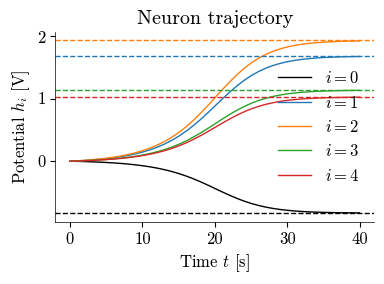

In [4]:
fig, ax = plot_neuron_trajectory(res)
for line, i in zip(ax.lines, range(5)):
	ax.axhline(rnn.F[i, 0], linestyle='--', color=line.get_color())

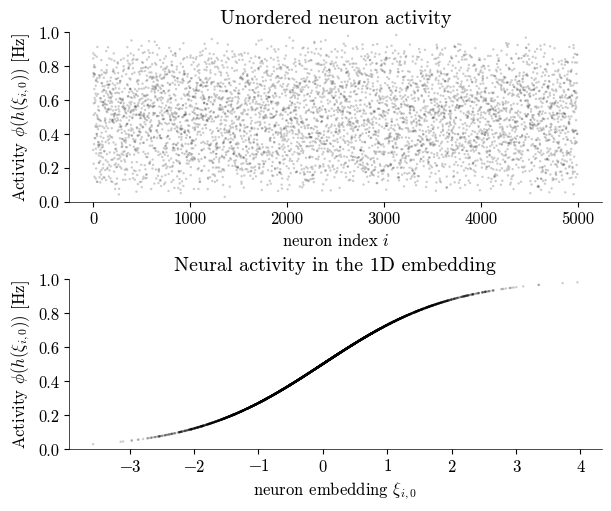

In [5]:
fig, ax = plt.subplots(figsize=(6, 5), nrows=2, constrained_layout=True)

Nmax = 5000
idt = -1
activity = rnn.phi(res.h[:Nmax, idt])
idx_mapping = np.arange(len(res.h[:Nmax, -1]))

ax[0].set_title('Unordered neuron activity')
# ax[0].stem(idx_mapping, activity)
ax[0].scatter(idx_mapping, activity, c='k', alpha=0.2, s=3, ec=None)
ax[0].set_xlabel('neuron index $i$')
ax[0].set_ylabel('Activity $\\phi(h(\\xi_{i,0}))$ [Hz]')
ax[0].set_ylim((0,1))

# at the fixed point, all neurons are in state Xi_i, so the activity follows Phi(Xi)
ax[1].set_title('Neural activity in the 1D embedding')
ax[1].scatter(rnn.F[:Nmax, 0], activity, c='k', alpha=0.2, s=3, ec=None)
ax[1].set_xlabel('neuron embedding $\\xi_{i,0}$')
ax[1].set_ylabel('Activity $\\phi(h(\\xi_{i,0}))$ [Hz]')
ax[1].set_ylim((0,1))

# fig.savefig('../presentation/2023-04-20/embedding_d=1.png', transparent=True)
plt.show()

at the fixed point, all neurons are in state Xi_i, so the activity follows Phi(Xi)

In [6]:
rnn = LowRankRNN.new_valentin(p=1, N=50_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True)
res = rnn.simulate(h0=np.zeros(rnn.N), t_span=(0, 40), progress=True)

simulating LowRankRNN{N=50000, p=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:19<00:00]


In [13]:
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt, matplotlib.animation as animation
from tqdm import tqdm
from scipy import stats
from pathlib import Path
from math import ceil

def anim(rnn: LowRankRNN, res: Result, outpath: Path, time_stride: int = 1, Nmax = 1500):
	activity = rnn.phi(res.h[:Nmax])
	idx_mapping = np.arange(len(res.h[:Nmax, -1]))

	fig, axes = plt.subplots(ncols=3, figsize=(8, 3), dpi=200,
		width_ratios=[1,30,30], layout=None)

	# neuron index

	axes[1].set_title('Unordered neuron activity', fontsize='medium')
	sc_idx = axes[1].scatter(
		idx_mapping, activity[:, 0], c=activity[:, 0],
		s=3, ec=None, clip_on=False,
		cmap=cmap_bi, vmin=0, vmax=1)
	axes[1].set_xlabel('Neuron index $i$')
	axes[1].set_ylim((0,1))
	axes[1].yaxis.set_visible(False)
	axes[1].spines.left.set_visible(False)
	axes[1].set_xlim((0, Nmax))
	breathe(axes[1], 'x')

	# neuron embedding

	axes[2].set_title('Neural activity in the 1D embedding', fontsize='medium')
	sc_emb = axes[2].scatter(
		rnn.F[:Nmax, 0], activity[:, 0], c=activity[:, 0],
		s=3, ec=None, clip_on=False,
		cmap=cmap_bi, vmin=0, vmax=1)
	axes[2].set_xlabel('Neuron embedding $z_{1i}$')
	# axes[2].set_ylabel('Activity $\\phi(h(z_{1i}))$ [Hz]')
	axes[2].set_ylim((0,1))
	axes[2].yaxis.set_visible(False)
	axes[2].spines.left.set_visible(False)
	axes[2].set_xlim((-3, 3))
	axes[2].set_xticks([-3, 0, 3])
	breathe(axes[2], 'x')

	fig.colorbar(
		sc_emb, cax=axes[0],
		location='left',
		label='Activity $\\phi(h(z_{1i}))$ [Hz]')

	fig.subplots_adjust(wspace=0.2)
	plt.draw()  # force initialization draw
	# plt.show()
	# return

	with tqdm(total=ceil(len(res.t)/time_stride)+1) as pbar:
		def update(idt: int):
			# update the scatters
			sc_idx.set_offsets(np.vstack((idx_mapping, activity[:, idt])).T)
			sc_idx.set_array(activity[:, idt])
			sc_emb.set_offsets(np.vstack((rnn.F[:Nmax, 0], activity[:, idt])).T)
			sc_emb.set_array(activity[:, idt])

			pbar.update(1)

		ani = animation.FuncAnimation(fig, update, frames=range(0, len(res.t), time_stride))
		ani.save(outpath, writer='ffmpeg', fps=15)

		# plt.show()
		plt.close()

anim(rnn, res, 'animations/embedding_d=1.mp4', Nmax=1000, time_stride=5)

100%|██████████| 82/82 [00:20<00:00,  3.99it/s]


=========

archive

In [10]:
rnn = LowRankRNN.new_valentin(p=1, N=50_000, phi=sigmoid, I_ext=zero, exclude_self_connections=True)
res = rnn.simulate(h0=np.zeros(rnn.N), t_span=(0, 40), dt_max=1, progress=True)
animate1d(rnn, res, 'animations/embedding_d=1_h0=0_phi=sigmoid.mp4', Nmax=4000, time_stride=20)

simulating LowRankRNN{N=50000, p=1, phi=sigmoid, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=40.000 of 40 [00:05<00:00]
100%|██████████| 46/46 [00:43<00:00,  1.06it/s]


In [11]:
# linear approximation to the sigmoid
# Nicole: the stability of this is inconclusive by linear stability analysis !
rnn = LowRankRNN.new_valentin(p=1, N=100_000, phi=lambda x: linear(x, a=0.25, b=0.5), I_ext=zero, exclude_self_connections=True)
res = rnn.simulate(h0=np.zeros(rnn.N), t_span=(0, 1000), dt_max=10, progress=True)
animate1d(rnn, res, 'animations/embedding_d=1_h0=0_phi=linear.mp4', Nmax=4000, time_stride=6)

simulating LowRankRNN{N=100000, p=1, phi=<lambda>, I_ext=zero, exclude_self_connections=True}: 100.00%|██████████| t=1000.000 of 1000 [00:37<00:00]
100%|██████████| 53/53 [01:00<00:00,  1.13s/it]
